<a href="https://colab.research.google.com/github/Rathtana/Yahoo-Finance-Scraper/blob/main/Scraper%2BData%2BVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Python Modules**

- request
- BeautifulSoup
- pandas
- matplotlib includes some basic chart plotting functions
- plotly for interactive chart plotting functions
---

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd 

!pip install plotly==4.5.0
import matplotlib.pyplot as plt   
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 10)

     |████████████████████████████████| 7.1MB 8.9MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy



# **Step 2: Yahoo Finance Table Scrapper**





The code will perform Header scraping method for any tables on Yahoo Finance

In [3]:
def scrape_table(Url):
    soup = BeautifulSoup(requests.get(Url).text)
    headers = [header.text for listing in soup.find_all('thead') for header in listing.find_all('th')]
    raw_data = {header:[] for header in headers}

    for rows in soup.find_all('tbody'):
      for row in rows.find_all('tr'):
        if len(row) != len(headers) or row.find_all('td')[3].text == '-': 
          continue
        for idx, cell in enumerate(row.find_all('td')):
          raw_data[headers[idx]].append(cell.text)

    return pd.DataFrame(raw_data)

# **Step 2: Data Type Conversion**


The data type conversion functions is used for coverting value to floats, date time object, and market cap to numeric value


In [4]:
def convert_column_to_float(df, columns):
  for column in columns: 
    df[column] = pd.to_numeric(df[column].str.replace(',',''))
  return df

def convert_column_to_datetime(df, columns):
  for column in columns:
    df[column] = pd.to_datetime(df[column])
  return df

def revert_scaled_number(number):
  mapping = {'M': 1000000, 'B': 1000000000, 'T': 1000000000000}
  scale = number[-1]
  return float(number[0:-1]) * mapping[scale]

# **Step 3: Basic Chart Types**

Extract any stock price data for the last 90 days. Then convert the data into the right format and the following table shows each date's open, close, low and high price.

In [12]:
%load_ext google.colab.data_table
#%unload_ext google.colab.data_table
apple = scrape_table("https://finance.yahoo.com/quote/AAPL/history?p=AAPL")[0:90]
# TODO: use the data type conversion functions to convert the data columns
apple = convert_column_to_float(apple, apple.columns[1:])
apple = convert_column_to_datetime(apple, [apple.columns[0]])
apple

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-02-12,134.35,135.53,133.69,135.37,135.37,60029300
1,2021-02-11,135.90,136.39,133.77,135.13,135.13,64154400
2,2021-02-10,136.48,136.99,134.40,135.39,135.39,73046600
3,2021-02-09,136.62,137.88,135.85,136.01,136.01,76774200
4,2021-02-08,136.03,136.96,134.92,136.91,136.91,71297200
...,...,...,...,...,...,...,...
85,2020-10-12,120.06,125.18,119.28,124.40,124.00,240226800
86,2020-10-09,115.28,117.00,114.92,116.97,116.59,100506900
87,2020-10-08,116.25,116.40,114.59,114.97,114.60,83477200
88,2020-10-07,114.62,115.55,114.13,115.08,114.71,96849000


Using "Date" as X-axis, "Price" as Y-axis, use Matplotlib to draw the stock movement graph.

References：
*   lw = linewidth (The width of the line)
*   kind (The mark on the line)
*   grid (Whether to use grid cells)
*   title (Add title to the graph)


<class 'numpy.ndarray'>


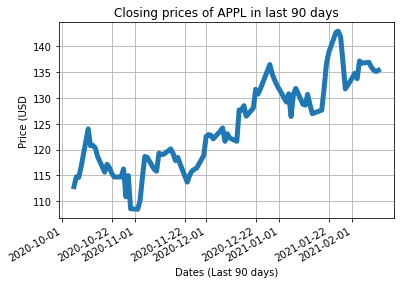

In [16]:
ts = pd.Series(apple["Adj Close**"].values, index=apple["Date"])
# TODO: plot the line chart using matplotlib
ts.plot(lw=5, kind='line', grid=True, title="Closing prices of APPL in last 90 days")
plt.xlabel('Dates (Last 90 days)')
plt.ylabel('Price (USD')
# apple["Adj Close**"].values
# apple["Date"]

print(type(apple["Adj Close**"].values))

**Pie chart**

- The pie chart show the percentage distribution of market capitalization of different cryptocurrencies

In [64]:
df=scrape_table("https://finance.yahoo.com/cryptocurrencies?count=200&offset=0")
df['Market Cap']=df['Market Cap'].apply(revert_scaled_number)
# TODO: aggregate the data and plot a pie chart showing the market cap distribution of cryptocurrencies
market_cap_sum = sum(df['Market Cap'])

df.loc[df['Market Cap']/ market_cap_sum < 0.01, 'Name'] = 'Others'

fig = px.pie(df, values="Market Cap", names="Name", title="Market Share of Cryptocurrencies")

fig.update_layout(
        width=1000,
        height=500,
        margin=dict(l=0,r=0,t=30,b=5)
)
fig.show()

**Candle Stick Charts**

Using Plotly to draw the candlestick graph (Move cursor on the graph to show hover data).

References：


*   autosize (Auto zoom-in and out)
*   margin (Adjust the margin of the graph; l:left, r:right, t:top, b:bottom)
*   paper_bgcolor (Change background color of the graph)


In [53]:
# TODO: use plotly to plot a candlestick chart showing apple's stock history
fig = go.Figure(data=[go.Candlestick(
    x=apple['Date'],
    open=apple['Open'],
    close=apple['Close*'],
    high=apple['High'],
    low=apple['Low']
)])

fig.update_layout(
        width=725,
        height=500,
        margin=dict(l=0,r=0,t=30,b=5)
)

fig.show()

#Step 4: Advanced Chart Types

**Multi-stock area graph**
- Using the web scraper to obtain data from various stocks 
- Then, stack them together in an area chart/line chart.

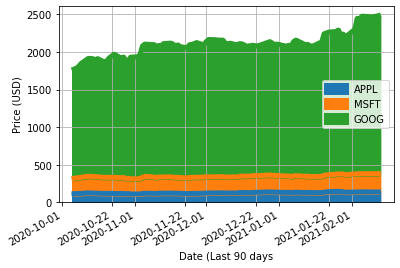

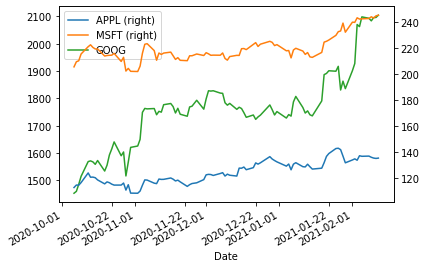

In [13]:
microsoft, google = (scrape_table("https://finance.yahoo.com/quote/"+s+"/history?p="+s)[0:90] for s in ["MSFT", "GOOG"])
microsoft, google = convert_column_to_float(microsoft, microsoft.columns[1:]), convert_column_to_float(google, google.columns[1:])
microsoft, google = convert_column_to_datetime(microsoft, [microsoft.columns[0]]), convert_column_to_datetime(google, [google.columns[0]])
 
# TODO: plot a multi-stock graph using matplotlib
stocks = pd.DataFrame(
    {
    "APPL": apple["Adj Close**"].values,
    "MSFT": microsoft["Adj Close**"].values,
    "GOOG": google["Adj Close**"].values
    },
    index=apple['Date']
)

stocks.plot(lw=5, kind='area', grid=True)
plt.xlabel('Date (Last 90 days')
plt.ylabel('Price (USD)')

stocks.plot(secondary_y=["APPL", "MSFT"], kind='line')

**Heatmaps**

- The rectangle area represents market capitalization
- The color gradient represents percentage price change (positive, negative)
- Ticker symbol is shown on each rectangle
- Hovering over the square will show the underlying details of a stock

In [14]:
activestocks = scrape_table("https://finance.yahoo.com/most-active?count=200&offset=0")
marketCaps = activestocks['Market Cap'].apply(revert_scaled_number)
percentChanges = activestocks['% Change'].str.replace('+','').str.replace('%','').astype(float)


In [52]:
# TODO: plot a heatmap showing the active stock data
fig = px.treemap(activestocks,
                 title="Active stocks heatmap (Size=market Cap, Color=Percent Change)",
                 path=['Symbol'],
                 values=marketCaps,
                 hover_name='Name',
                 hover_data=['Price (Intraday)', '% Change', 'Volume', 'Market Cap'], 
                 color=percentChanges,
                 color_continuous_scale="RdYlGn",
                 range_color=[-1, 1]
                 )

fig.update_layout(
        width=725,
        height=500,
        margin=dict(l=0,r=0,t=30,b=5)
)

fig.show()

**Bubble Charts**
- Bubble: Stock Market Cap 
- % Change vs. Price (Intraday)  

In [63]:
activestocks = scrape_table("https://finance.yahoo.com/most-active?count=200&offset=0")
activestocks['Market Cap']=activestocks['Market Cap'].apply(revert_scaled_number)
activestocks['% Change']=activestocks['% Change'].str.replace('+','').str.replace('%','').astype(float)
activestocks['Price (Intraday)']=activestocks['Price (Intraday)'].str.replace(',','').astype(float)


# TODO: plot a bubble chart showing the active stock data
fig = px.scatter(activestocks, x="Price (Intraday)", y="% Change",
                  size="Market Cap", color="Name",
                  hover_name="Name", size_max=60)

fig.update_layout(
        width=1000,
        height=500,
        margin=dict(l=0,r=0,t=30,b=5)
)
fig.show()